# chapter 3. 차원 축소
==========================================================================================================================================


## 3.1 차원 축소의 동기부여
------------------------------------------------------

**[문제]**
 차원이 너무 크면 feature 공간이 너무 커서 알고리즘이 데이터를 잘 훈련할 수 없음(=차원의 저주)

**[해결방안]**
 차원 축소 알고리즘 : 중복정보를 제거. 축소과정에서 노이즈가 제거됨

### 3.1.1 MNIST 숫자 데이터베이스

-  MNIST 숫자 데이터  
     : [28x28] 손글씨 숫자 이미지 데이터(Train set 50000건, Validation set 10000건, Test set 10000건)  

    (1) 데이터 수집 및 탐색하기(라이브러리 불러오기)

    (2) MNIST 데이터셋 가져오기

    (3) 데이터셋 구조 확인하기

    (4) 데이터셋을 pd.DataFrame으로 변환

    (5) 데이터 탐색

    (6) 이미지 시각화
  
 <br/>  


In [28]:
### MNIST 숫자 데이터 ###
## 3.3.2 PCA 실전 예제

# 라이브러리 불러오기
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

'''데이터 준비 및 모델 평가 관련 라이브러리'''
from sklearn import preprocessing as pp


In [27]:
current_path = os.getcwd()
sd = current_path.find('4')
print(current_path[:sd+1])

C:\Users\user200904


In [4]:
# 데이터 셋 가져오기
current_path = os.getcwd()
sd = current_path.find('4')
current_path = current_path[:sd+1]
file = os.path.sep.join(['', 'datasets', 'mnist_data', 'mnist.pkl.gz'])

f = gzip.open(current_path+file, 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

In [5]:
# 데이터 셋 구조 확인
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [6]:
# 데이터 셋으로부터 판다스 데이터 프레임 만들기
train_index = range(0,len(X_train))
validation_index = range(len(X_train),len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation),len(X_train)+len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

# 훈련 데이터의 요약 결과 생성
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022784,0.015424,0.012080,0.007218,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [7]:
# 데이터 보기
X_validation.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 레이블 데이터 보기
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

In [9]:
#  데이터 이미지 시각화 
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape([28,28]) # 784개의 요소로 이루어진 하나의 행렬을 28x28형태로 변환
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

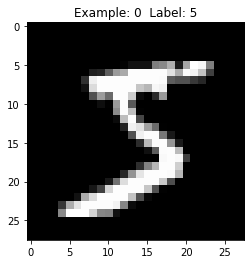

In [10]:
# 첫 번째 이미지 살펴보기(index=0)
view_digit(0)
# 결 과 : 대부분 흑백(0)으로 이루어져있으며 흰색(1) 부분이 글씨임을 확인


## 3.2 차원 축소 알고리즘
-------------------------------------------------------

### 3.2.1 선형 투영 vs  매니폴드 학습

  1.  선형 투영  
       : 데이터를 선형적으로 투영하는 차원축소 방법(고차원에서 저차원 공간)  
       : 훈련 샘플을 부분 공간에 수직으로 투영하면 2D 데이터 셋을 얻을 수 있음  
       *(예시) 주성분 분석(PCA), 특이값 분해(SVD), 랜덤 투영(random projection)*  
  투영 전 3차원 데이터셋   |  투영 후 2차원 데이터셋
:-------------------------:|:-------------------------:
![image](./image/chapter03/투영전.png)  |  ![image](./image/chapter03/두영후.png)


  2.  매니폴드 학습(==비선형 차원 축소)  
       : 고차원에서 저차원으로 데이터를 선형으로 투영하는 대신 비선형 차원 축소를 사용하는 방법  
       : 2D 매니폴드는 고차원 공간에서 휘어지거나 뒤틀린 모양  
      *(예시) 아이소맵 : 데이터 사이 곡선거리(지오데식 거리)를 학습하는 기법*  
 2D 매니폴드 예시(스위스폴)   |
 :-------------------------:|
![image](./image/chapter03/매니폴드.png)  |


  3.  그 외 다른 기법  
      : 다차원 스케일링(MDS), 지역 선형 임베딩(LLE), t-분포 확률적 임베딩(t-SNE),   
        사전학습, 랜덤 트리 임베딩, 독립 성분 분석  

 <br/>

## 3.3 PCA(주성분분석)
----------------------------------------------

### 3.3.1 PCA개요

> **PCA란?**  
    -  <U>분산을 보존</U>하면서 데이터의 저차원 표현 찾는 가장 일반적인 선형 축소 기법  
    -  <U>상관관계가 높은 feaure들을 결합</U>해 선형적인 상관관계가 없는 <U>더 적은 feature들로 데이터를 표현</U>하려함  
    -  원본 고차원 데이터에서 <U>최대 분산 방향을 찾음</U>으로써 상관관계를 지속적으로 감소시키고 더 작은 차원 공간에 이들을 투영함  
    -  이렇게 파생된 성분을 <U>**주성분**</U>이라고 함 

* PCA을 하는 이유
![image](./image/chapter03/주성분분석.png)  


* 분산이 최대가 되는 축 찾기( 해당 예시의 분산 최대 축은 C1이다) 
![image](./image/chapter03/PCA.png)  

* PCA는  원본 feature의 상대적 범위에 민감하기에 실행 전에 스케일링 과정이 필요  
`해당 데이터(MNIST)는 이미 0~1 사이 값으로만 이루어져있기에 feature 스케일링 과정이 필요 없음   
 이처럼 데이터에 따라 다르지만 대부분의 데이터에는 스케일 과정 필요`  


* pca를 하기 전에 데이터 스케일링을 하는 이유는 데이터의 스케일에 따라 주성분의 설명 가능한 분산량이 달라질 수 있기 때문임  
   (분산 = 정보량)

### 3.3.2 PCA 실전 예제

In [14]:
### PCA ###
# 하이퍼파라미터 설정
from sklearn.decomposition import PCA

n_components = 784 # 주성분 개수
whiten = False
random_state = 2018

# PCA 적용
# - 주성분 개수를 원본 데이터의 차원수(=feature 개수)로 설정
# - PCA가 원본 차원에서 핵심 정보 추출 후 주성분 생성 

pca = PCA(n_components=n_components, whiten=whiten,
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train) 
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)
# - fit_transform() : 특징행렬을 낮은 차원의 근사행렬로 변환
# - inverse_transform() : 변환된 근사행렬을 원래의 차원으로 복귀

print(X_train_PCA.shape) 
# 결과해석 : 단지 데이터를 변환만 했기에 차원의 변화 없음 

(50000, 784)


In [15]:
# PCA 평가
# - 784개의 주성분으로 추출한 원본 데이터의 분산 비율
# - pca를 실제 데이터에 적용해야 해당 값 추출 가능
# - 주성분 784개로 추출했기에 분산은 100%가 돼야함

print("Variance Explained by all 784 principal components: ",
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  1.0000000553304436


In [16]:
# X개의 주성분으로 추출한 원본 데이터의 분산 비율(고유값을 기준으로 설명할 수 있는 분산량)
# 주성분 개수 : 10개, 20개, 50개, 100개, 200개, 300개
# 처음 차원(784개)보다 훨씬 적은 차원의 수(300개)로 원본 데이터의 약 99%의 분산을 잡아냄

importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.4887624]
Variance Captured by First 20 Principal Components:  [0.6439803]
Variance Captured by First 50 Principal Components:  [0.824861]
Variance Captured by First 100 Principal Components:  [0.91465855]
Variance Captured by First 200 Principal Components:  [0.96650076]
Variance Captured by First 300 Principal Components:  [0.98624897]


<AxesSubplot:>

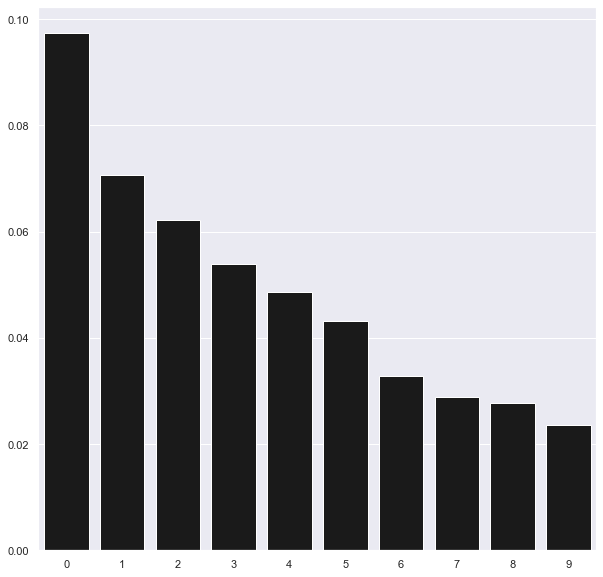

In [17]:
# PCA의 주성분 중요도(10개 주성분의 각 주성분 순위)
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9],color='k')

In [18]:
# PCA로 데이터 분리해서 시각화
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label",
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title(algoName+"를 사용한 관측치의 구분")

In [19]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus = False)

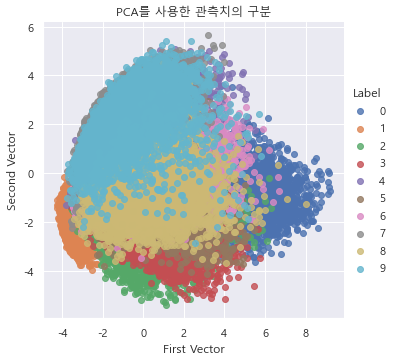

In [20]:
# PCA 결과로 나온 상위 첫번째,두번째 주성분의 산점도 시각화
# 결과 : 같은 lable들이 더 가까워지도록 데이터들을 잘 분리
scatterPlot(X_train_PCA, y_train, "PCA")

Text(0.5, 1.0, '원본 Feature Set을 사용한 관측치의 구분')

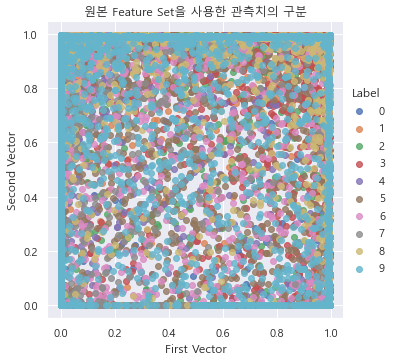

In [21]:
# 지도 힉습 모델 결과로 나온 중요도 높은 feature들의 산점도
# 결과 : PCA보다 분리되지 않음을 볼 수 있음
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("원본 Feature Set을 사용한 관측치의 구분")

### 3.3.3 점진적 PCA

> **점진적 PAC란?**  
    - <U>배치 기반 PCA 유형</U>  
    - 데이터가 너무 커서 저장이 어려울 때, 배치를 작게 설정해 점진적으로 PCA를 실행하는 기법  

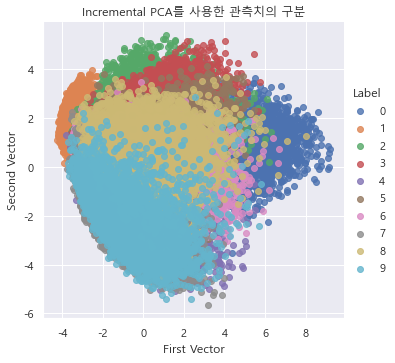

In [22]:
## 3.3.3 점진적 PCA

from sklearn.decomposition import IncrementalPCA

n_components = 784
batch_size = None

incrementalPCA = IncrementalPCA(n_components=n_components,
                                batch_size=batch_size)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = pd.DataFrame(data=X_train_incrementalPCA, index=train_index)

X_validation_incrementalPCA = incrementalPCA.transform(X_validation)
X_validation_incrementalPCA = pd.DataFrame(data=X_validation_incrementalPCA, index=validation_index)

scatterPlot(X_train_incrementalPCA, y_train, "Incremental PCA")
# 결과 : 일반 PCA와 거의 유사한 결과가 나옴

### 3.3.4 희소 PCA

> **희소 PAC란?**  
    - 희소성이 필요할 때, alpha라는 하이퍼파라미터를 통해 제어함으로써 <U>희소성 유지</U>하는 기법  
    - 희소 : 값이 대부분 0인 행렬 또는 데이터(어느정도 유지 시, 자료해석의 용이함,변수 선택 효과, 과대적합 방지)  
    - 일반 PCA는 모든 입력 변수에서 선형 결합 하지만 희소 PCA는 <U>일부 입력 변수에서만 선형 결합 실행</U> 

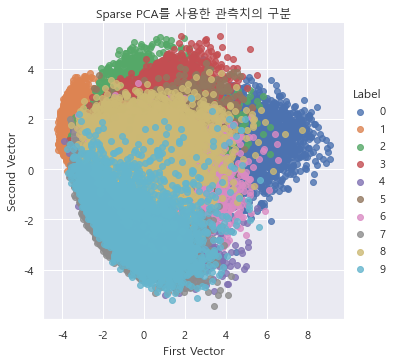

In [23]:
## 3.3.4 희소 PCA

from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components,
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:10000,:]) # 일반 PCA보다 느리기에 50000개 중 10000개만 사용
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)

X_validation_sparsePCA = sparsePCA.transform(X_validation)
X_validation_sparsePCA = pd.DataFrame(data=X_validation_sparsePCA, index=validation_index)

scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

# 원본에서는 주성분을 서로 다르게 생성하여 관측치의 분리에도 차이가 존재해야하는데 실제 실행시 같은 결과가 나옴

### 3.3.5 커널 PCA

> **커널 PAC란?**  
    - 원본 데이터 쌍에 대해 유사성 함수(커널 기법)를 실행시켜 비선형적 투영으로 차원 축소  
    - 투영 후 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때에도 유용 
    ![image](./image/chapter03/커널PCA.png)

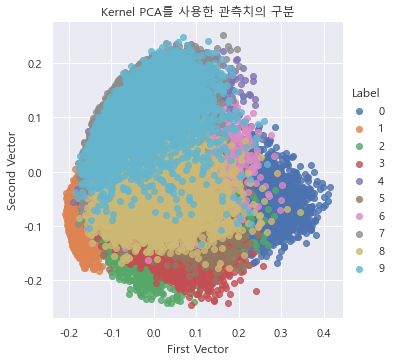

In [24]:
## 3.3.5 커널 PCA

from sklearn.decomposition import KernelPCA

n_components = 100
kernel = 'rbf' # 가장 많이 사용되는 함수 : 방사형 기저 함수 커널(radial basis function kernel)
gamma = None
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel,
                      gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train.loc[:10000,:])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)

X_validation_kernelPCA = kernelPCA.transform(X_validation)
X_validation_kernelPCA = pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)

scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

## 3.4 SVD

> **SVD란?**  
    - 원본 행렬의 계수(rank)를 더 작은 계수로 줄이고 더 작은 계수 행렬에서 일부 선형 결합을 사용해 원본 행렬을 다시 만들 수 있도록 하는 것   
    - <U>train set 행렬 X를 세 개 행렬의 행렬 곱셈인 U∑V^T로 분해</U>  
    &nbsp;&nbsp;&nbsp;&nbsp;   `X = U∑V^T (V: 주성분 행렬)`  
    - 많은 정보를 가진 특잇값을 가진 원본 행렬의 벡터 유지  
    - PCA 연산에 포함되어 있음  


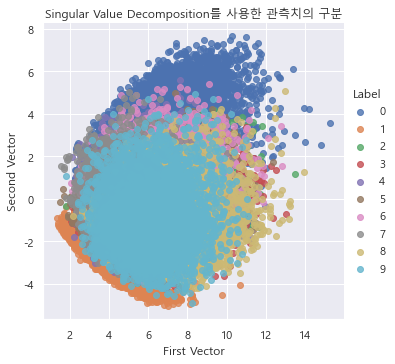

In [25]:
### SVD(특잇값 분해) ###
from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm,
                   n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)

X_validation_svd = svd.transform(X_validation)
X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)

scatterPlot(X_train_svd, y_train, "Singular Value Decomposition")

## 3.5 랜덤 투영
-------------------------------------
- 존슨-린덴슈트라우스 보조정리 기반  
> 존슨-린덴슈트라우스 보조정리에 따르면, 고차원 공간에서 저차원 공간으로 이동하는 경우에도 원본 feature의 핵심 정보가 유지됨

- 랜덤 투영의 종류
   * 가우시안 랜덤 투영
   * 희소 랜덤 투영

</br>

### 3.5.1 GRP(가우시안 랜덤 투영)
- 저차원 공간의 주성분 수와 하이퍼파라미터 설정 가능  
- eps(입실론) : 존슨-린덴슈트라우스 보조정리에 따라 임베딩 품질 제어, 작을수록 차원의 수 높아짐

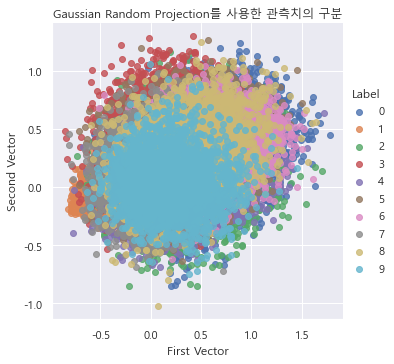

In [36]:
### 랜덤 투영 ###
## GRP(가우시안 랜덤 투영)
from sklearn.random_projection import GaussianRandomProjection

n_components = 'auto'
eps = 0.5 # 0~1 사이 값을 가짐
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps,
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

### 3.5.2 SRP(희소 랜덤 투영)
- 변환된 데이터셋이 어느 정도의 희소성을 유지하며 일반적으로 GRP보다 빠르게 변환시켜 더 효율적임

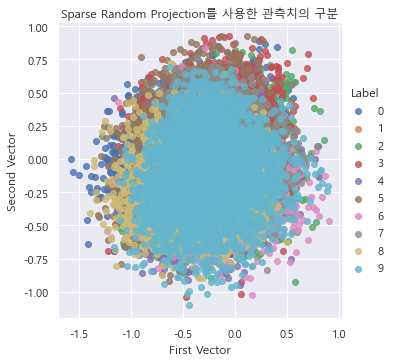

In [37]:
## SRP(희소 랜덤 투영)
from sklearn.random_projection import SparseRandomProjection

n_components = 'auto'
density = 'auto'
eps = 0.5
dense_output = False
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components,
        density=density, eps=eps, dense_output=dense_output,
        random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)

X_validation_SRP = SRP.transform(X_validation)
X_validation_SRP = pd.DataFrame(data=X_validation_SRP, index=validation_index)

scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

## 3.6 Isomap
- 매니폴드 학습의 기본 유형
- 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 생성
- 샘플 간 곡선 거리 또는 지오데식 거리를 유지하면서 차원 축소
- 지오데식 거리는 두 노드 사이의 최단경로를 이루는 노드의 수

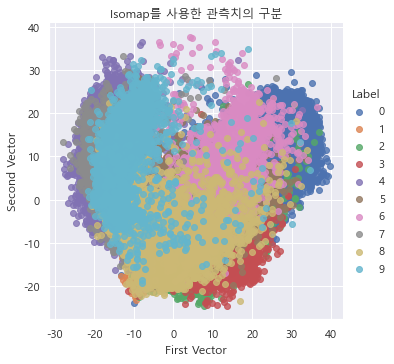

In [38]:
### Isomap ###
from sklearn.manifold import Isomap

n_neighbors = 5
n_components = 10
n_jobs = 4

isomap = Isomap(n_neighbors=n_neighbors,
                n_components=n_components, n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000,:])
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)

X_validation_isomap = isomap.transform(X_validation)
X_validation_isomap = pd.DataFrame(data=X_validation_isomap,
                                   index=validation_index)

scatterPlot(X_train_isomap, y_train, "Isomap")

## 3.7 MDS(다차원 스케일링)  
- 비선형 차원 축소의 한 유형
- 샘플간 거리(유사성)를 보존하면서 차원 축소

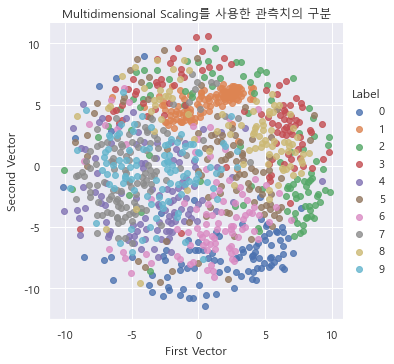

In [39]:
### MDS(다차원 스케일링) ###
from sklearn.manifold import MDS

n_components = 2
n_init = 12
max_iter = 1200
metric = True
n_jobs = 4
random_state = 2018

mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter, 
          metric=metric, n_jobs=n_jobs, random_state=random_state)

X_train_mds = mds.fit_transform(X_train.loc[0:1000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:1001])

scatterPlot(X_train_mds, y_train, "Multidimensional Scaling")

## 3.8 LLE(지역 선형 임베딩)  
- 비선형 차원 축송의 한 유형
- 투영에 의존하지 않는 매니폴드 학습
- 서로 인접한 데이터들을 보존(neighborhood-preserving)하면서 고차원인 데이터셋을 저차원으로 축소하는 방법
- 결과로 나올 축의 수와 고려할 이웃 수 설정 가능
![image](./image/chapter03/LLE.png)

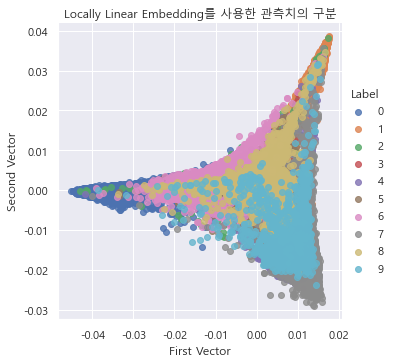

In [40]:
### LLE(지역 선형 임베딩) ###
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 10
n_components = 2
method = 'modified'
n_jobs = 4
random_state = 2018

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, 
        n_components=n_components, method=method, 
        random_state=random_state, n_jobs=n_jobs)

lle.fit(X_train.loc[0:5000,:])
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)

scatterPlot(X_train_lle, y_train, "Locally Linear Embedding")

## 3.9 t-SNE(t-분포 확률적 임베딩)  
- 고차원 데이터를 시각화하기 위한 비선형 축소 기법
- 유사한 데이터는 가깝게, 유사하지 않은 데이터들은 더 멀리 모델링함
- 거리가 가까운 데이터 정보를 우선하여 보존한다는 점에서 LLE와 비슷하지만   
  LLE는 가까운 정도를 True, False 로 규정하는 것에 반해(이웃으로 확정한 뒤에는 다른 인스턴스를 고려 X)     
  SNE는 연속적인 확률 분포(가우시안 분포)로서 가중치를 부여함(일정 범위 내의 인스턴스를 모두 고려하되 거리에 따라 확률을 부여)  

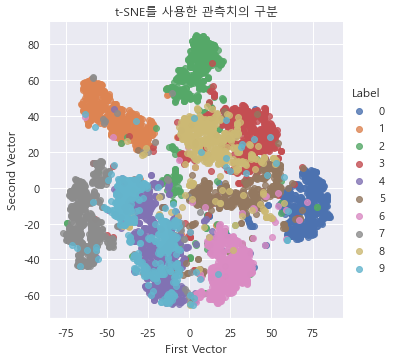

In [41]:
### t-SNE(t-분포 확률적 임베딩) ###
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, 
            perplexity=perplexity, early_exaggeration=early_exaggeration, 
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train, "t-SNE")

# 3.10 사전 학습
- 기하학적 구조나 거리 척도에 의존하지 않는 방법(비거리 기반 기법)
- 원본 데이터의 희소 표현을 학습하는 방법
  - 결과 행렬 : 사전
  - 사전을 구성하는 벡터 : 원자(0 또는 1로 구성된 이진 행렬)  
  - `원본데이터에 d개의 feature존재, 사전에 n개의 원자가 있다 가정 시, 해당 사전을 가질 수 있음`
       -  n < d : 과소완전( 차원 축소를 통해 더 적은 수의 벡터로 원본데이터 재표현)
       -  n > d : 과대완전

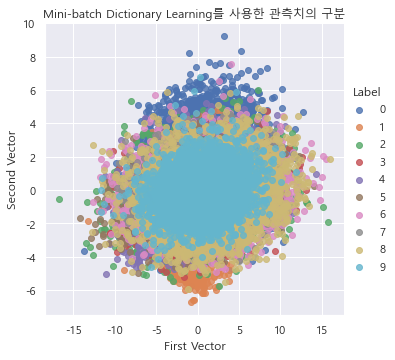

In [42]:
### 사전 학습 ###
# 미니-배치 사전 학습
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 50 #주성분 수
alpha = 1 #희소성 조정
batch_size = 200 #배치 사이즈
n_iter = 25
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( 
                        n_components=n_components, alpha=alpha, 
                        batch_size=batch_size, n_iter=n_iter, 
                        random_state=random_state)

miniBatchDictLearning.fit(X_train.loc[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame( 
    data=X_train_miniBatchDictLearning, index=train_index)

X_validation_miniBatchDictLearning = 
    miniBatchDictLearning.transform(X_validation)
X_validation_miniBatchDictLearning = 
    pd.DataFrame(data=X_validation_miniBatchDictLearning, index=validation_index)

scatterPlot(X_train_miniBatchDictLearning, y_train, "Mini-batch Dictionary Learning")

## 3.11 ICA(독립 성분 분석)
- 비거리 기반 기법
- 주어진 feature에 수많은 독립 신호가 함께 포함되어 있는 문제해결 방안
- 혼합 신호를 개별 성분으로 분리 -> 분리된 개별 성분을 조합해 원본 feature 재구성 가능
- (사용 예시) 신호 처리 작업 - 카페의 오디오 데이터에서 개별 음성 식별


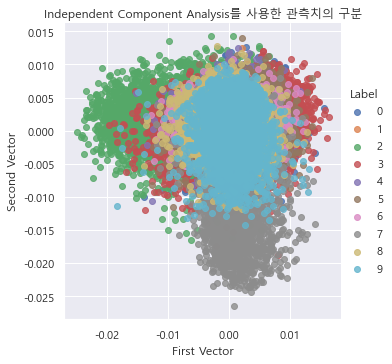

In [43]:
### ICA(독립 성분 분석) ###
from sklearn.decomposition import FastICA

n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 2018

fastICA = FastICA(n_components=n_components, algorithm=algorithm, 
                  whiten=whiten, max_iter=max_iter, random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=train_index)

X_validation_fastICA = fastICA.transform(X_validation)
X_validation_fastICA = pd.DataFrame(data=X_validation_fastICA, 
                                    index=validation_index)

scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")

## 3.12 정리
--------------------------
1. 선형기법  
  - PCA, 랜덤 투영  


2. 비선형기법(=매니폴드 학습)    
  - Isomap, MDS, LLE, t-SNE  


3. 비거리 기반 기법  
  - 사전학습, ICA
  